In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from scipy.stats import chi2_contingency

# Q1 Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

The diagnostic, binary-valued variable investigated is whether the
patient shows signs of diabetes according to World Health Organization
criteria (i.e., if the 2 hour post-load plasma glucose was at least 
200 mg/dl at any survey  examination or if found during routine medical
care).   The population lives near Phoenix, Arizona, USA.

Results: Their ADAP algorithm makes a real-valued prediction between
0 and 1.  This was transformed into a binary decision using a cutoff of 
0.448.  Using 576 training instances, the sensitivity and specificity
of their algorithm was 76% on the remaining 192 instances.

Several constraints were placed on the selection of these instances from
a larger database.  In particular, all patients here are females at
least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
routine that generates and executes digital analogs of perceptron-like
devices.  It is a unique algorithm; see the paper for details.

Number of Instances: 768

Number of Attributes: 8 plus class

@attribute 'preg' real

@attribute 'plas' real

@attribute 'pres' real

@attribute 'skin' real

@attribute 'insu' real

@attribute 'mass' real

@attribute 'pedi' real

@attribute 'age' real

@attribute 'class' { tested_negative, tested_positive}

# Q2 Compute mean & standard deviation ,tabulate and visualize the age of the patients.

In [53]:
df = pd.read_csv('Downloads/diabetes.csv', names = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class'])
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [54]:
def str2cat(s):
    if s == "tested_positive":
        return 1
    else:
        return 0

df['class'] = df['class'].apply(str2cat)

In [55]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
print('Average age of the patients is', df.age.mean(), "and standard deviation is", df.age.std())

Average age of the patients is 33.240885416666664 and standard deviation is 11.76023154067868


<AxesSubplot:xlabel='age', ylabel='Density'>

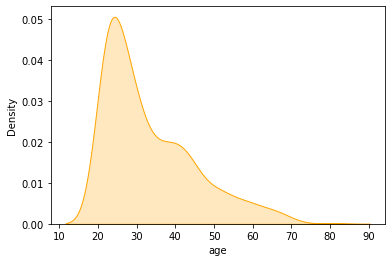

In [57]:
sns.kdeplot(data = df.age, color = 'orange', shade = True)

# Q3 Analyze and tabulate therelationship of age,BMI of patients with respect to the class.

Outliers have been removed


<AxesSubplot:>

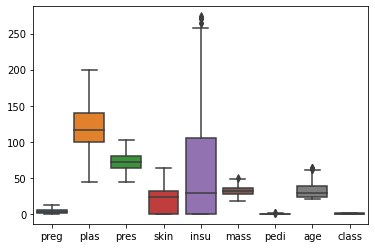

In [64]:
def outlier_normalisation(data):
    upper = data.quantile(0.75)
    lower = data.quantile(0.25)
    iqr = upper - lower
    factor = iqr * 1.5
    cond = (data >= upper + factor) | (data <= lower - factor)
    data.loc[cond] = data.median()
    return data

df[['preg','plas','pres','skin','insu','mass','pedi','age']] = df[['preg','plas','pres','skin','insu','mass','pedi','age']].apply(outlier_normalisation)
print("Outliers have been removed")
sns.boxplot(data = df)

In [59]:
chi_square_test = pd.crosstab(index = df['class'], columns = df['age'])
c, p, dof, expected = chi2_contingency(chi_square_test)
print(p)
print("P-value is less than 0.05 which means that there is a genuine relationship between age and class of patients")

5.354261982147526e-11
P-value is less than 0.05 which means that there is a genuine relationship between age and class of patients


In [60]:
chi_square_test = pd.crosstab(index = df['class'], columns = df['mass'])
c, p, dof, expected = chi2_contingency(chi_square_test)
print(p)
print("P-value is less than 0.05 which means that there is a genuine relationship between bmi and class of patients")

0.05271826184548281
P-value is less than 0.05 which means that there is a genuine relationship between bmi and class of patients


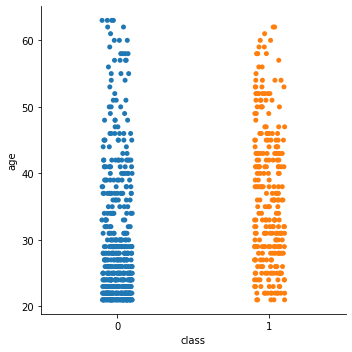

In [51]:
sns.catplot(data = df, x = 'class', y = 'age')

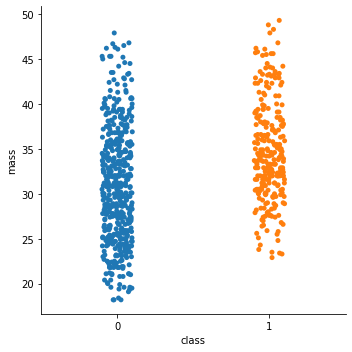

In [52]:
sns.catplot(data = df, x = 'class', y = 'mass')

# Q4 Tabulate the class label and comment on whether the classes are balanced.

In [63]:
print("We see that the classes are not balanced and the data is skewed")
df.groupby('class').count()

We see that the classes are not balanced and the data is skewed


,preg,plas,pres,skin,insu,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


# Q5 Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [123]:
X = df[['preg','plas','pres','skin','insu','mass','pedi','age']]
Y = df['class']
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 865)

In [124]:
LogReg = LogisticRegression(max_iter = 10000).fit(train_x, train_y)
print('Precision =', LogReg.score(test_x, test_y))

Precision = 0.7965367965367965


# Q6 Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

In [125]:
pred_y = LogReg.predict(test_x)
true_y = test_y
cf_matrix = sklearn.metrics.confusion_matrix(true_y, pred_y)
print(cf_matrix)

[[132  13]
 [ 34  52]]


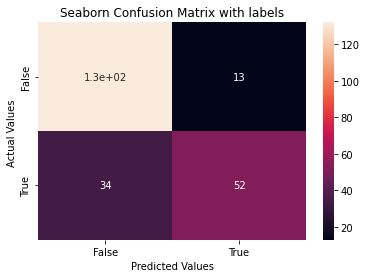

In [126]:
ax = sns.heatmap(cf_matrix, annot=True)

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Q7 Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [127]:
TN = cf_matrix[0,0]
FP = cf_matrix[0,1]
FN = cf_matrix[1,0]
TP = cf_matrix[1,1]

In [128]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [129]:
print("TPR =", TPR)
print("TNR =", TNR)
print("Accuracy =", ACC)

TPR = 0.6046511627906976
TNR = 0.9103448275862069
Accuracy = 0.7965367965367965


# Q8 Visualize the ROC curve, and comment on the performance of the classifier.

0.8611868484362469
The classifier has a very high AUC score which can be considered as an excellent analysis for the classification of diabetes 


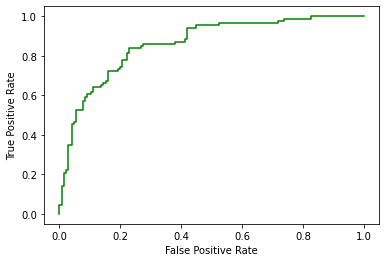

In [150]:
pred_proba_y = LogReg.predict_proba(test_x)
fpr, tpr, _ = sklearn.metrics.roc_curve(test_y,  pred_proba_y[::,1])
print(sklearn.metrics.roc_auc_score(test_y, pred_proba_y[::,1]))
print("The classifier has a very high AUC score which can be considered as an excellent analysis for the classification of diabetes ")
plt.plot(fpr,tpr, color = 'green')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()